# Exploratory Data Analysis - Insurance Dataset

#### Step 0. Environment Setup

Purpose: Import all required libraries for data manipulation and visualization. 
- Optional installation commands are kept separate and commented to avoid accidental execution.

In [2]:
# Optional: install required packages
# !pip install seaborn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display


#### Step 1. Load Dataset

Purpose: Load the prepared insurance dataset to be analyzed.
- This assumes preprocessing has already been completed upstream.

In [28]:
# Load datasets 
df = pd.read_csv('../../data/output/insurance_new.csv', parse_dates=['Date_birth', 'Date_driving_licence'])


#### Step 2. Inspect Dataset Shape

Purpose: Understand the size of the dataset.
- This immediately sets expectations around scale and feasibility of analysis.

In [29]:
 
##### Step 2. Inspect Dataset Shape
print(f"Dataset Shape: {df.shape[0]:,} rows and {df.shape[1]:,} columns")


Dataset Shape: 105,555 rows and 16 columns


#### Step 3. Preview the Data

Purpose: Visually inspect the first few rows to confirm schema and basic sanity.

In [30]:
#### Step 3. Preview the Data
display(df.head())


,Date_birth,Date_driving_licence,Distribution_channel,Payment,Premium,Type_risk,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1956-04-15,1976-03-20,Agent,Half-yearly,222.52,Motorbikes,Rural,No,2004,80,599,7068.0,0,Petrol,NaN,190
1,1956-04-15,1976-03-20,Agent,Half-yearly,213.78,Motorbikes,Rural,No,2004,80,599,7068.0,0,Petrol,NaN,190
2,1956-04-15,1976-03-20,Agent,Half-yearly,214.84,Motorbikes,Rural,No,2004,80,599,7068.0,0,Petrol,NaN,190
3,1956-04-15,1976-03-20,Agent,Half-yearly,216.99,Motorbikes,Rural,No,2004,80,599,7068.0,0,Petrol,NaN,190
4,1956-04-15,1976-03-20,Agent,Annually,213.70,Motorbikes,Rural,No,2004,80,599,7068.0,0,Petrol,NaN,190


#### Step 4. Dataset Structure and Data Types

Purpose: Examine column data types and identify potential type issues early
- E.g. numeric values stored as strings, unexpected nulls.

In [31]:
#### Step 4. Dataset Structure and Data Types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date_birth            105555 non-null  datetime64[ns]
 1   Date_driving_licence  105555 non-null  datetime64[ns]
 2   Distribution_channel  105555 non-null  object        
 3   Payment               105555 non-null  object        
 4   Premium               105555 non-null  float64       
 5   Type_risk             105555 non-null  object        
 6   Area                  105555 non-null  object        
 7   Second_driver         105555 non-null  object        
 8   Year_matriculation    105555 non-null  int64         
 9   Power                 105555 non-null  int64         
 10  Cylinder_capacity     105555 non-null  int64         
 11  Value_vehicle         105555 non-null  float64       
 12  N_doors               105555 non-null  int64         
 13 

#### Step 5. Statistical Summary

Purpose: Review central tendency and spread of numerical variables.
- This helps detect outliers, skewness, and invalid ranges.

In [32]:
#### Step 5. Statistical Summary
display(df.describe())


,Date_birth,Date_driving_licence,Premium,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Length,Weight
count,105555,105555,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,95226.000000,105555.000000
mean,1970-02-20 12:34:16.558192415,1992-09-12 15:59:51.814693632,315.892557,2004.728038,92.682611,1617.759367,18413.657243,4.067898,4.252007,1191.262422
min,1918-04-05 00:00:00,1942-10-01 00:00:00,40.140000,1950.000000,0.000000,49.000000,270.460000,0.000000,1.978000,43.000000
25%,1960-11-10 00:00:00,1983-04-13 00:00:00,241.610000,2001.000000,75.000000,1390.000000,13127.210000,3.000000,3.999000,1043.000000
50%,1970-08-11 00:00:00,1993-07-16 00:00:00,292.280000,2005.000000,90.000000,1598.000000,17608.770000,5.000000,4.230000,1205.000000
75%,1980-03-03 00:00:00,2003-01-24 00:00:00,361.640000,2008.000000,110.000000,1910.000000,22595.000000,5.000000,4.443000,1388.000000
max,2000-10-11 00:00:00,2018-11-26 00:00:00,2993.340000,2018.000000,580.000000,7480.000000,220675.800000,6.000000,8.218000,7300.000000
std,NaN,NaN,140.927969,6.767037,37.012645,604.697382,9135.074235,1.511839,0.393220,458.081834


#### Step 6. Duplicate Row Analysis

Purpose: Identify whether duplicated records exist, which may bias modeling results.

In [33]:
# #### Step 6. Duplicate Row Analysis
print(f"Number of duplicated rows: {df.duplicated().sum():,}")


Number of duplicated rows: 5,076


#### Step 7. Missing Value Analysis (Tabular)

Purpose: Quantify missing values per column before visual inspection.

In [34]:
#### Step 7. Missing Value Analysis (Tabular)
df.isnull().sum()


Date_birth                  0
Date_driving_licence        0
Distribution_channel        0
Payment                     0
Premium                     0
Type_risk                   0
Area                        0
Second_driver               0
Year_matriculation          0
Power                       0
Cylinder_capacity           0
Value_vehicle               0
N_doors                     0
Type_fuel                   0
Length                  10329
Weight                      0
dtype: int64

#### Step 8. Missing Value Visualization

Purpose: Visualize missingness patterns to detect structural gaps
- E.g. entire columns or correlated missing fields.

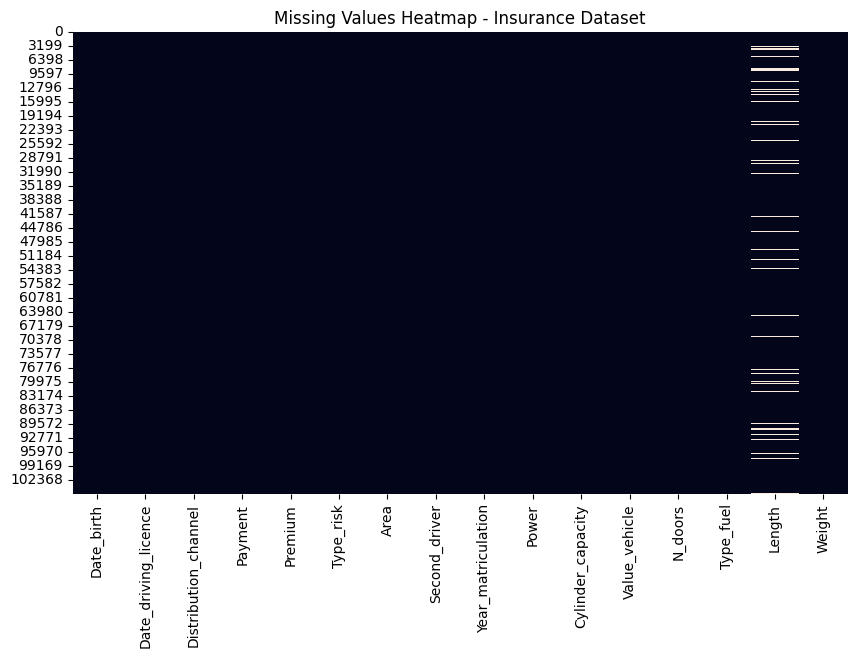

In [35]:
## ### Step 8. Missing Value Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap - Insurance Dataset")
plt.show()


#### Step 9. Categorical Feature Distribution

Purpose: Analyze class balance for categorical variables.
Percent-based plots make imbalance immediately visible.

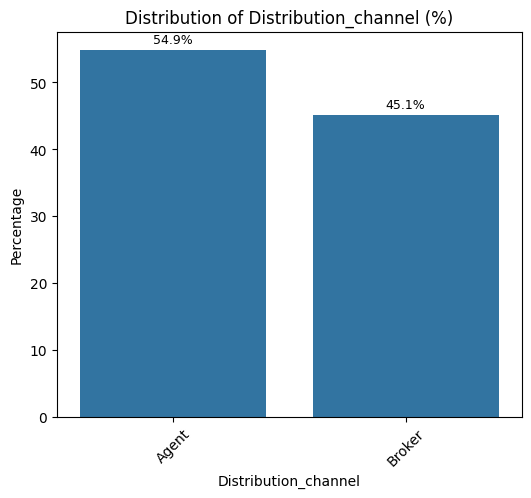

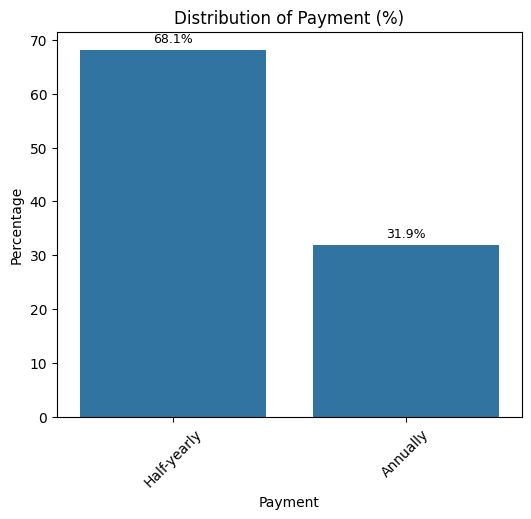

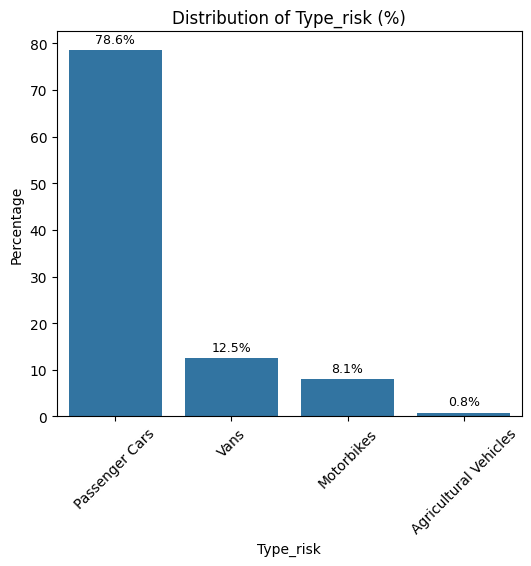

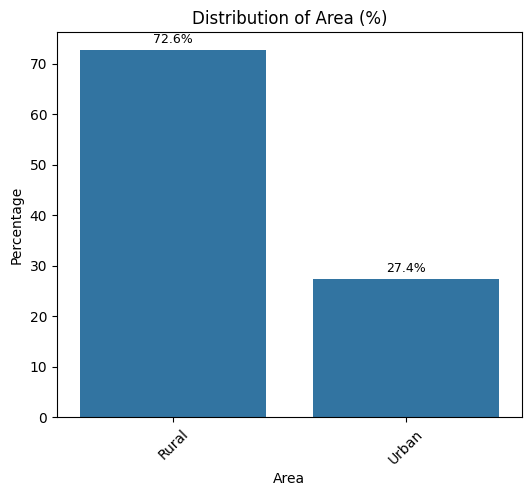

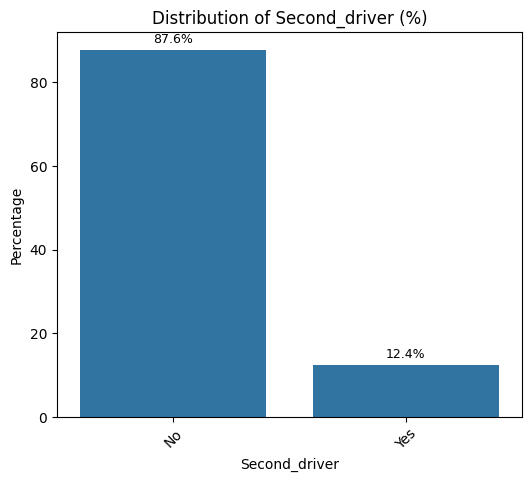

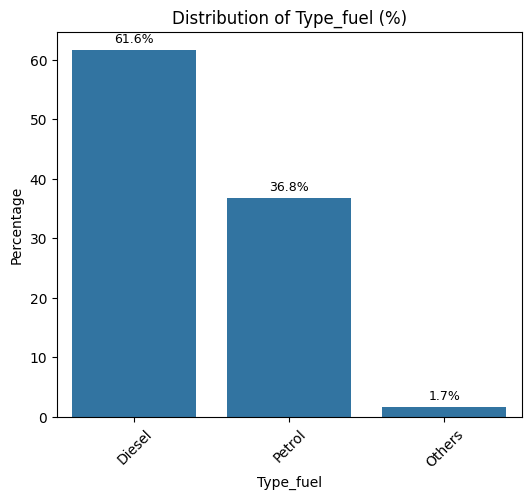

In [38]:
## ### Step 9. Categorical Feature Distribution
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    plt.figure(figsize=(6, 5))
    ax = sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        stat="percent"
    )

    plt.title(f"Distribution of {col} (%)")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)

    for p in ax.patches:
        value = p.get_height()
        ax.annotate(
            f"{value:.1f}%",
            (p.get_x() + p.get_width() / 2, value),
            ha="center",
            va="bottom",
            fontsize=9,
            xytext=(0, 3),
            textcoords="offset points",
        )

    plt.show()


#### Step 10. Numerical Feature Distribution

Purpose: Inspect distribution shape, skewness, and potential outliers
for all numerical variables.

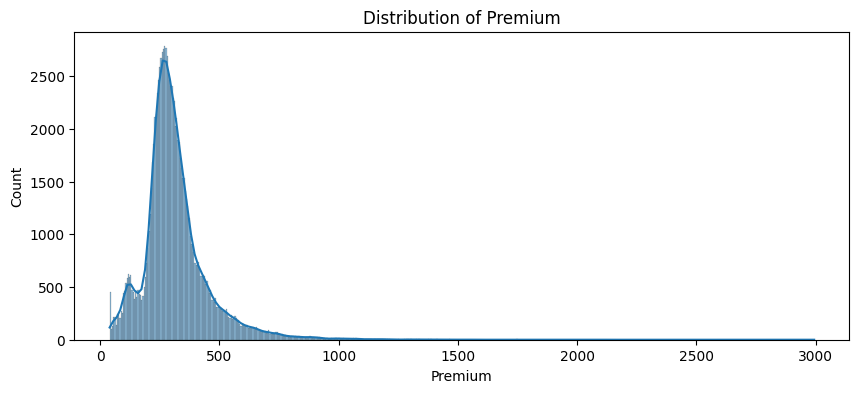

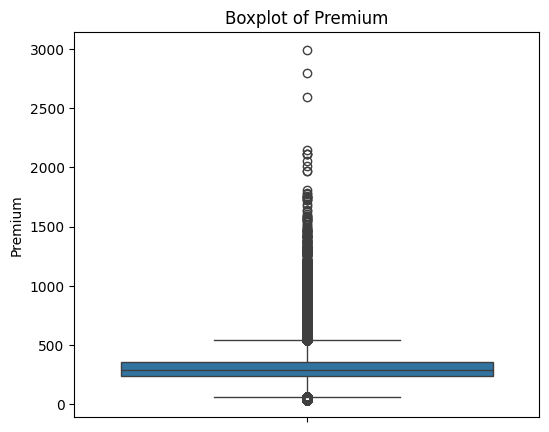

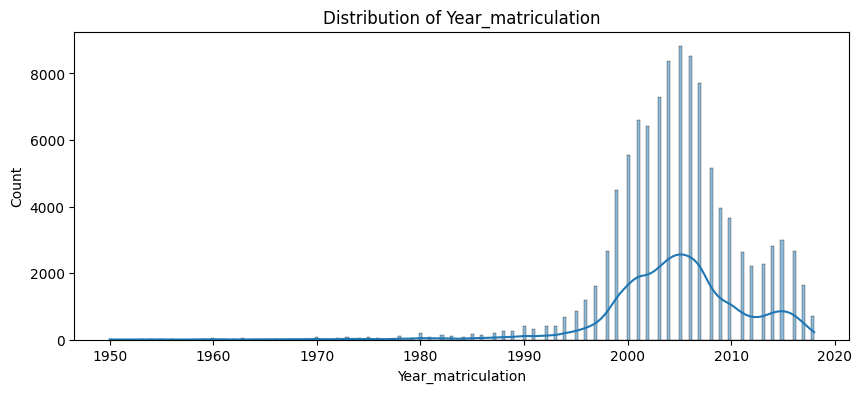

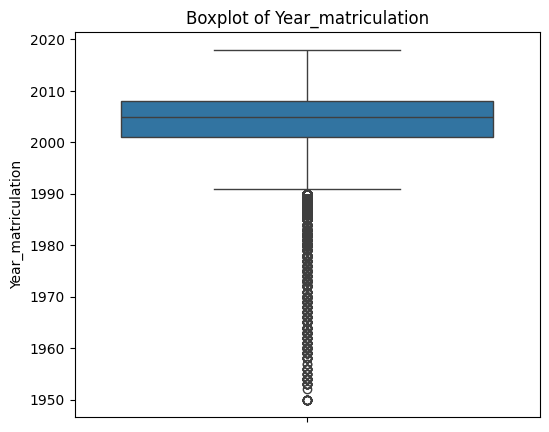

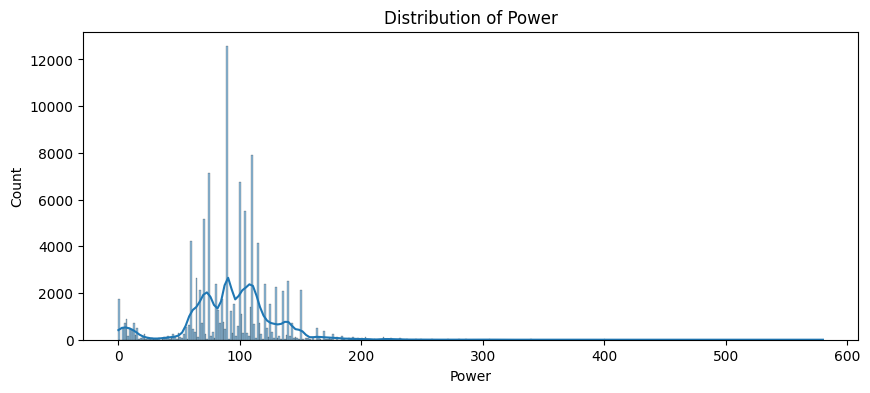

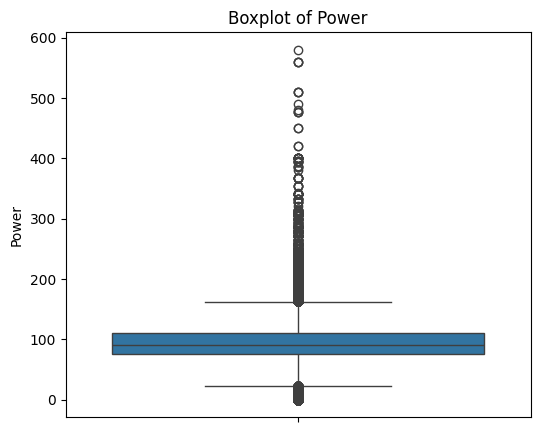

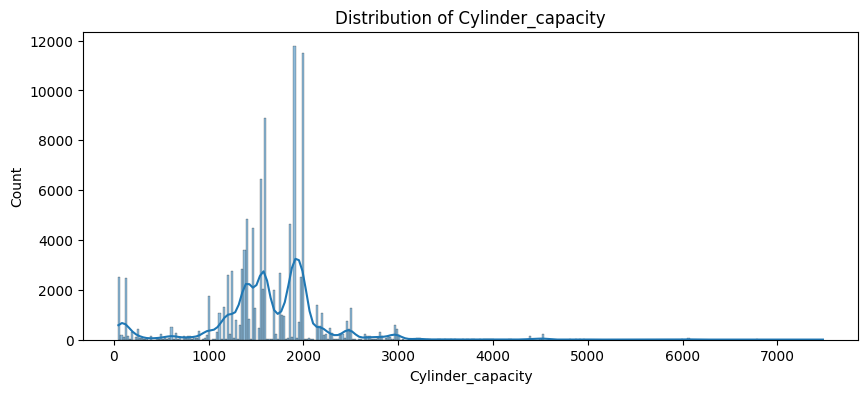

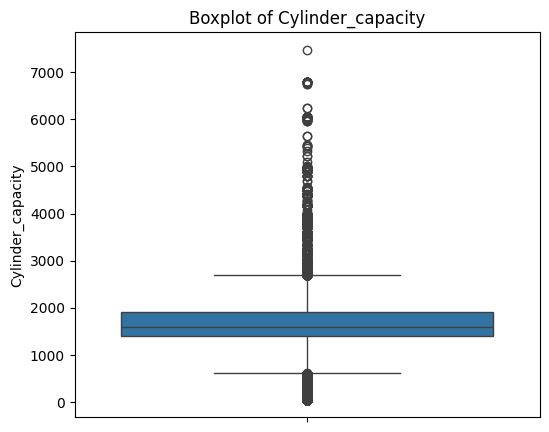

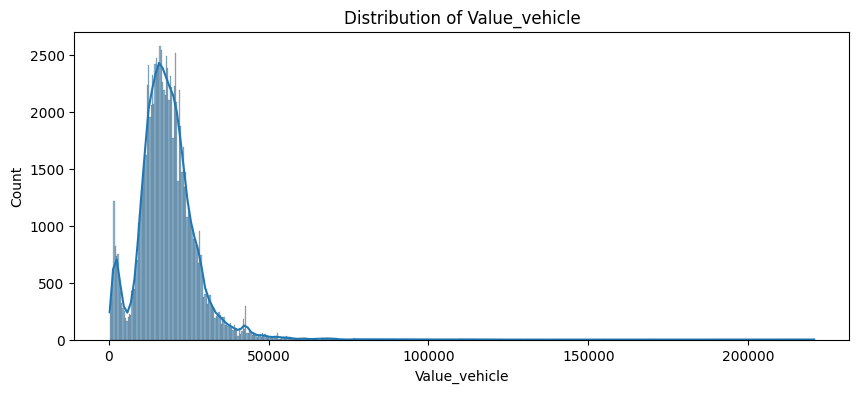

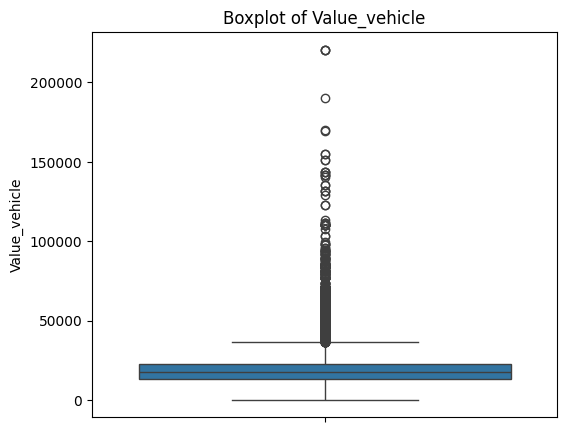

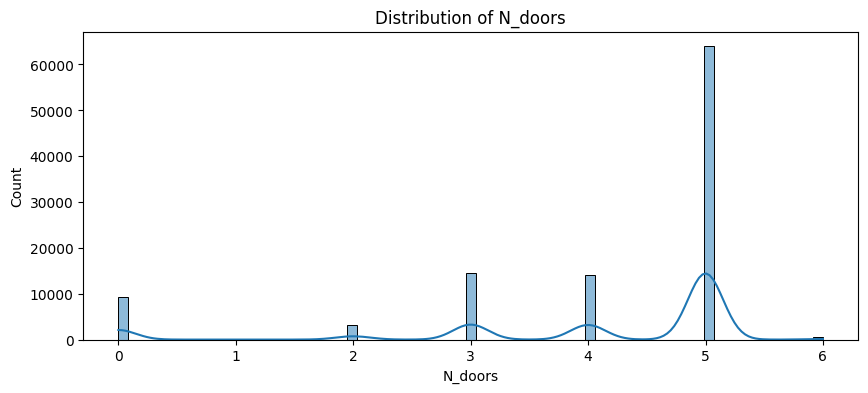

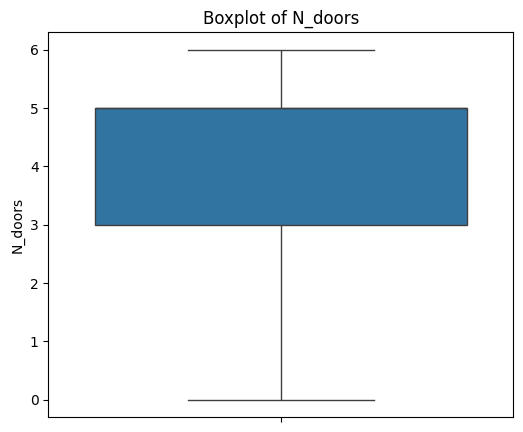

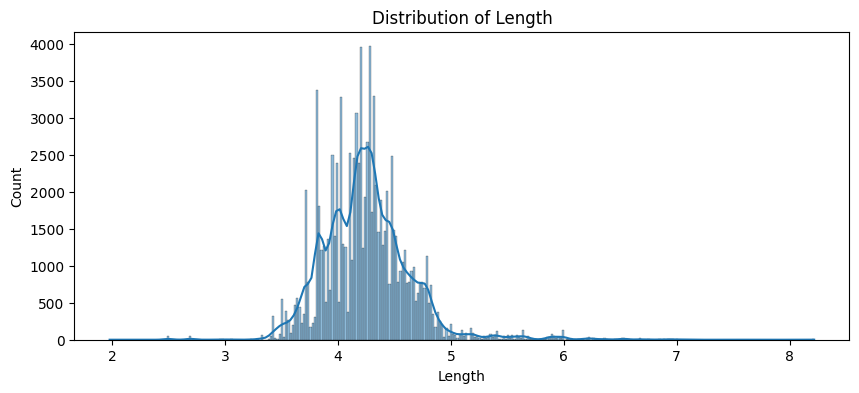

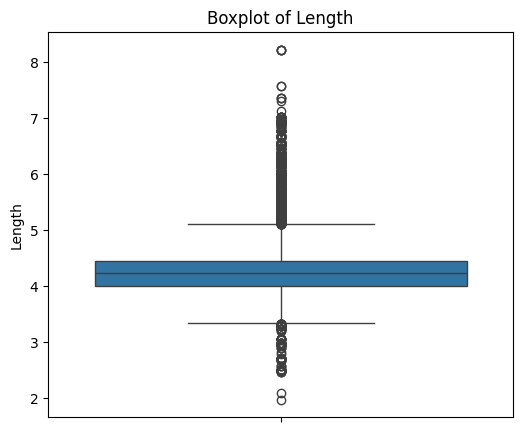

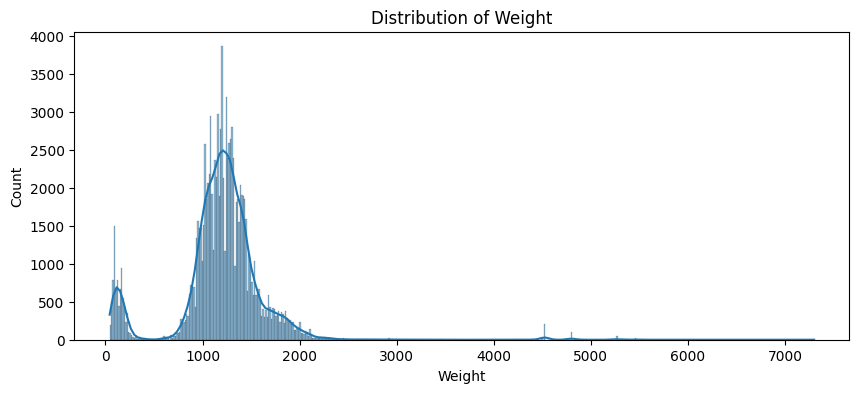

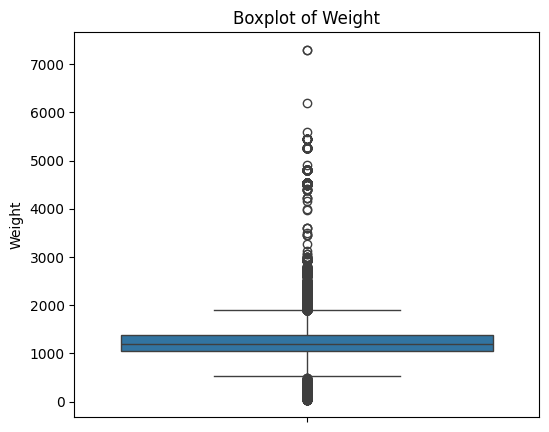

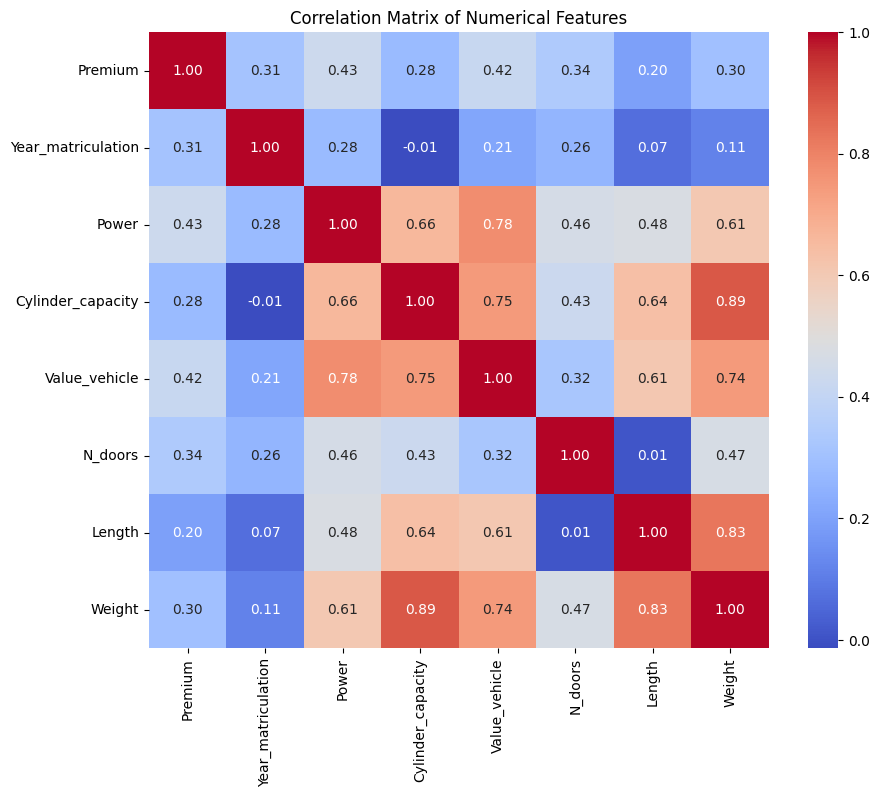

In [46]:
numerical_cols = df.select_dtypes(exclude=["object", "datetime"]).columns

for col in numerical_cols:
    # histogram with KDE
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    
    # boxplot for outlier detection
    plt.figure(figsize=(6, 5))
    sns.boxplot(data=df,y=col)
    plt.title(f"Boxplot of {col}")
    plt.show()
    
# check correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()